In [352]:
# Standard libraries
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Getting our data ready to be used with machine learning

Three main thins we have to do:

    1. Cleaning the data
    2. Filling (also called imputing) or disregarding missing values
    3. Converting non-numerical values to numerical values (also called feature encoding)
    4. Split the data into feature and labels (usually x & y)

In [353]:
df_train = pd.read_csv("titanic/train.csv")
df_test = pd.read_csv("titanic/test.csv")

df_overview = pd.read_csv("titanic/gender_submission.csv")

### 1. Cleaning the data
1. Verifying the correlation matrix of the DataFrame
2. Analyzing which attributes can be dropped without affecting the analysis
3. Dropping those attributes

<AxesSubplot:>

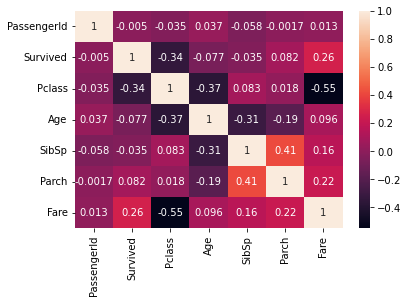

In [354]:
# Cleaning the data
corr_matrix = df_train.corr()
sn.heatmap(corr_matrix, annot = True)

In [355]:
# Verifying which attributes has missing values 
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [356]:
# Varifying how many classes are and how many people were in each one
classes = df_train.groupby("Pclass").size()
classes

Pclass
1    216
2    184
3    491
dtype: int64

In [357]:
# Veryfing how many different amounts of fare people paid to embark
fares = df_train.groupby("Fare").size()
fares

Fare
0.0000      15
4.0125       1
5.0000       1
6.2375       1
6.4375       1
            ..
227.5250     4
247.5208     2
262.3750     2
263.0000     4
512.3292     3
Length: 248, dtype: int64

#### Attributes that don't affect the analysis and can be dropped:
1. **Name** = Each cell has its own name, even if two passenger had the same name, it'll not contribute to the analysis. To identify the passenger, we can use `PassengerId`, not being a good attribute to conduct the analysis.
2. **Ticket** = Again, the value is unique, but to identify the passenger we can use the `PaasengerId`.
3. **Cabin** = Most of the rows has this attribute as NaN, making this irrelavant to the analysis.
4. **Fare** = There are 248 different values for `Fare`. And the correlation with the `Pclass` attribute is not enough to establish a pattern for this attribute. Therefore, it's not going to be considated for the analysis.

In [358]:
df_train.drop(['Name', 'Ticket', 'Cabin', 'Fare'], axis = 1, inplace = True)

In [359]:
df_test.drop(['Name', 'Ticket', 'Cabin', 'Fare'], axis = 1, inplace = True)

### 2. Filling or disregarding the missing values
1. Analyze which attributes has missing values
2. Filling or desregarding those values

In [360]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Embarked         2
dtype: int64

In [361]:
# For the 'Embarked' atributte, thinking about the future encondig of non-numerical values, we're going to fill the missing values with 'missing'
df_train["Embarked"].fillna("missing", inplace=True)

# For the 'Age' attribute, we're going to fill the missing values with de mean of the other ages
df_train["Age"].fillna(df_train["Age"].mean(), inplace=True)

In [362]:
df_test.isna().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Embarked        0
dtype: int64

In [363]:
# For the 'Age' attribute, we're going to fill the missing values with de mean of the other ages
df_test["Age"].fillna(df_test["Age"].mean(), inplace=True)

### 3. Turning the non-numerical attributes into numerical ones
1. Verifying which attributes are not numerical
2. Adjusting them
3. Dropping the originals to "clean" the dataset

In [364]:
# Turn the categories into numbers
from sklearn import preprocessing

# Adjusting the 'Sex' attribute
le = preprocessing.LabelEncoder()
le.fit(df_train['Sex'])
df_train['Sex_adjusted'] = le.transform(df_train['Sex'])
df_test['Sex_adjusted'] = le.transform(df_test['Sex'])

In [365]:
# Adjusting the 'Embarked' attribute
le = preprocessing.LabelEncoder()
le.fit(df_train['Embarked'])
df_train['Embarked_adjusted'] = le.transform(df_train['Embarked'])
df_test['Embarked_adjusted'] = le.transform(df_test['Embarked'])

In [366]:
# Dropping the original attributes, with non-numerical values
df_train.drop(['Sex', 'Embarked'], axis = 1, inplace = True)

In [367]:
df_test.drop(['Sex', 'Embarked'], axis = 1, inplace = True)

In [368]:
df_train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Sex_adjusted,Embarked_adjusted
0,1,0,3,22.000000,1,0,1,2
1,2,1,1,38.000000,1,0,0,0
2,3,1,3,26.000000,0,0,0,2
3,4,1,1,35.000000,1,0,0,2
4,5,0,3,35.000000,0,0,1,2
...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,1,2
887,888,1,1,19.000000,0,0,0,2
888,889,0,3,29.699118,1,2,0,2
889,890,1,1,26.000000,0,0,1,0


#### To do now
1. Refine the evaluation metrics
2. Evaluate some other models, choosing those models from the Scikit Learn guide
3. Refine the hyperparameters of the model
4. Make the predictions
5. Save the predictions into a .csv file

## 2. Choosing the right estimator/algorithm for the problem

If you're working on a machine learning problem and looking to use Sklearn and not sure what model you should use, refer to the sklearn machine learning map: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

For the current problem, we're going to test three models:
1. LinearSVC()
2. KNeighborsClassifier()
3. RandomForestClassifier()

For each one, we'll evaluate the Accuracy, Precision, Recall and F1-Score metrics. The classification report is also being presented, summing up the evaluation results. At last, we're going to see how the confusion matrix for each model looks like.

In [369]:
# Importing the libraries to split the data, make the predictions and evaluate the models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [370]:
# Splitting the data using a random seed to guarantee that the division of the dataframe is always made the same way
# Setup random seed
np.random.seed(42)

# Make the data
X = df_train.drop("Survived", axis=1)
y = df_train["Survived"]

# Split the data 
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.2)

In [371]:
# Function to evaluate the model performance
def evaluate_preds(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    metric_dict = {"accuracy": round(accuracy,2),
                   "precision": round(precision,2),
                   "recall": round(recall,2),
                   "f1": round(f1,2)
                  }
    print(f"Accuracy: {accuracy*100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metric_dict

In [372]:
# Import the LinearSVC estimator class
from sklearn.svm import LinearSVC

# Instantiate LinearSVC
clf = LinearSVC(max_iter=10000, dual=False) #fix the warning
clf.fit(X_train, y_train)

# Make the predictions
y_pred = clf.predict(X_test)

# Evaluate model usin evaluation functions
print("Classifier metrics on the test set:")
evaluate_preds(y_test,y_pred)
print("--------------------------------------------------------------")
print(classification_report(y_test,y_pred))

Classifier metrics on the test set:
Accuracy: 78.77%
Precision: 0.76
Recall: 0.72
F1 score: 0.74
--------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       105
           1       0.76      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



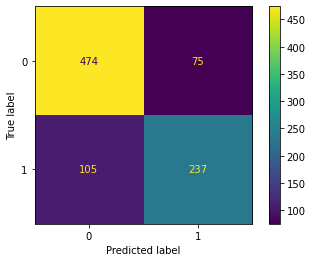

In [373]:
# Plotting the confusion matrix
ConfusionMatrixDisplay.from_estimator(estimator = clf, X=X,y=y)

In [374]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate KNeighborsClassifier
clf2 = KNeighborsClassifier(n_neighbors=10)
clf2.fit(X_train, y_train)

# Make the predictions
y_pred = clf2.predict(X_test)

# Evaluate model usin evaluation functions
print("Classifier metrics on the test set:")
evaluate_preds(y_test,y_pred)
print("--------------------------------------------------------------")
print(classification_report(y_test,y_pred))

Classifier metrics on the test set:
Accuracy: 56.42%
Precision: 0.41
Recall: 0.12
F1 score: 0.19
--------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.59      0.88      0.70       105
           1       0.41      0.12      0.19        74

    accuracy                           0.56       179
   macro avg       0.50      0.50      0.44       179
weighted avg       0.51      0.56      0.49       179



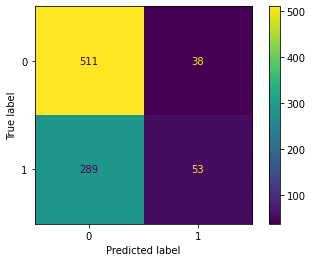

In [375]:
# Plotting the confusion matrix
ConfusionMatrixDisplay.from_estimator(estimator = clf2, X=X,y=y)

In [376]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate Random Forest Classifier
clf3 = RandomForestClassifier()
clf3.fit(X_train, y_train)

# Make the predictions
y_pred = clf3.predict(X_test)

# Evaluate model usin evaluation functions
print("Classifier metrics on the test set:")
evaluate_preds(y_test,y_pred)
print("--------------------------------------------------------------")
print(classification_report(y_test,y_pred))

Classifier metrics on the test set:
Accuracy: 81.01%
Precision: 0.81
Recall: 0.70
F1 score: 0.75
--------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       105
           1       0.81      0.70      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



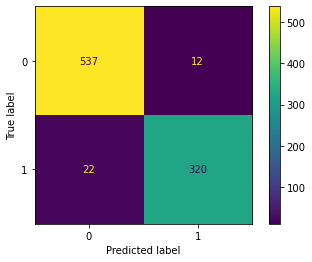

In [377]:
# Plotting the confusion matrix
ConfusionMatrixDisplay.from_estimator(estimator = clf3, X=X,y=y)

In [380]:
from sklearn.tree import DecisionTreeClassifier 

# Instantiate DecisionTreeClassifier 
clf4 = DecisionTreeClassifier()
clf4.fit(X_train, y_train)

# Make the predictions
y_pred = clf4.predict(X_test)

# Evaluate model usin evaluation functions
print("Classifier metrics on the test set:")
evaluate_preds(y_test,y_pred)
print("--------------------------------------------------------------")
print(classification_report(y_test,y_pred))

Classifier metrics on the test set:
Accuracy: 76.54%
Precision: 0.74
Recall: 0.68
F1 score: 0.70
--------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.83      0.81       105
           1       0.74      0.68      0.70        74

    accuracy                           0.77       179
   macro avg       0.76      0.75      0.75       179
weighted avg       0.76      0.77      0.76       179



Looking at the evaluation results, we're a going to use the Random Forest Classifier, a method that ensembles various classifiers.

## 3. Tuning the hyperparameters with RandomizedSearchCV

Now that we've chosen a model, we can try to improve the hyperparameters to get even better prediction results.
To do so, we're going to use the RandomizedSearchCV.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Creating the grid with the possible values for each hyperparameter
grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ['auto','sqrt'],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]
       }

np.random.seed(42)

# Split into X & y
X = df_train.drop("Survived", axis=1)
y = df_train["Survived"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestCLassifier
clf = RandomForestClassifier(n_estimators=1000, n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=100, #number of models to try -- all the possibilities
                            cv = 5,
                            verbose= 2)
# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train,y_train);


In [ ]:
# Looking at the best values for each hyperparameter, found by the RandomizedSearchCV
rs_clf.best_params_

In [302]:
# Make predictions with the best hyperparameters
rs_y_pred = rs_clf.predict(X_test)

# Evaluate model using evaluation functions
print("Classifier metrics on the test set:")
evaluate_preds(y_test,rs_y_pred)
print("--------------------------------------------------------------")
print(classification_report(y_test,rs_y_pred))

Classifier metrics on the test set:
Accuracy: 0.8268156424581006
Precision: 0.8412698412698413
Recall: 0.7162162162162162
F1-score: 0.7737226277372262
--------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       105
           1       0.84      0.72      0.77        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.82       179



## 4. Making the predictions over the dataframe for tests
Using the data aimed for test the model, called at the beginning of the code `df_test`, to make the predictions. The steps here are:
1. Make the predictions
2. Format the file that will be submitted
3. Save the submission dataframe into a .csv file

In [303]:
# Let's make the predictions on our test dataframe
real_pred = rs_clf.predict(df_test)

In [304]:
# Formatting the submission, accordingly with the rules of the challenge
submission = df_test[['PassengerId']].copy()
submission['Survived'] = real_pred

In [305]:
# Prediction results
submission.groupby("Survived").size()


Survived
0    291
1    127
dtype: int64

In [306]:
# Saving the predictions into a .csv file
submission.to_csv("titanic_challenge_submission.csv", index= False)

## Bonus: Saving the model
To do so, we're going to use Joblib().

In [307]:
from joblib import dump, load

# Save model to file
dump(rs_clf, filename="titanic_challenge_model_2.joblib")

['titanic_challenge_model_2.joblib']